# Project Overview

Hi, I'm Ankit.

This project focuses on predicting diabetes onset using data from the UCI Machine Learning Repository. We will conduct a comprehensive exploratory data analysis (EDA) to uncover insights into the dataset, followed by the application of **logistic regression**,**Random Forest**  and **XGBoost** models with **k-fold cross-validation** to assess performance. By leveraging these techniques, we aim to identify the optimal model for accurate predictions.

This report is intended for a technically proficient audience, providing a detailed understanding of the methodology and results for effective data storytelling.



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Overview of the data set
The data set we are going to work on this project is "The Pima Indians Diabetes dataset" this data set consists of **768 female patients** of Pima Indian heritage, aged 21 and older directly downloaded from kaggle as .csv. 
The aim is to predict diabetes onset based on there health related measurements like (BMI, glucose level, blood pressure etc.).

In [33]:
# dataset download link => https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

In [34]:
# importing the data set
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Cleaning the data and performing EDA(Exploritory data analysis)

In [35]:
# are there any missing values
df.isna().values.any()

False

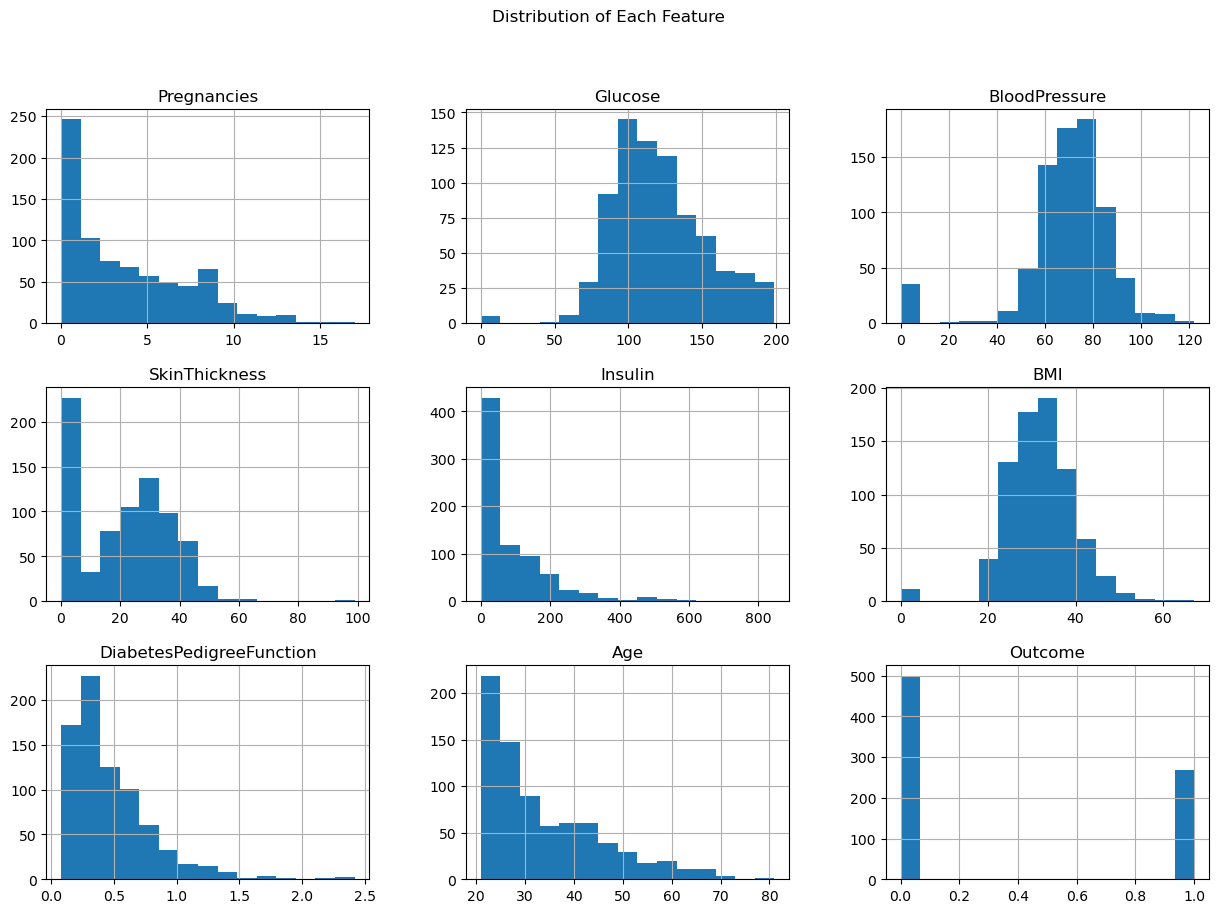

In [36]:
df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Each Feature')
plt.show()

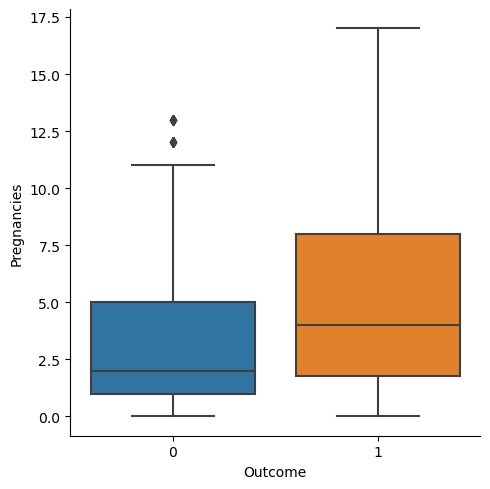

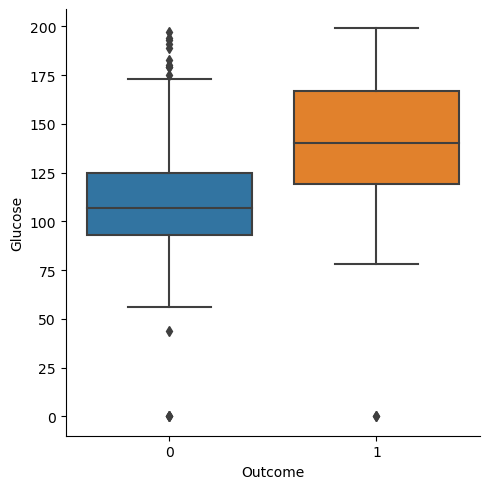

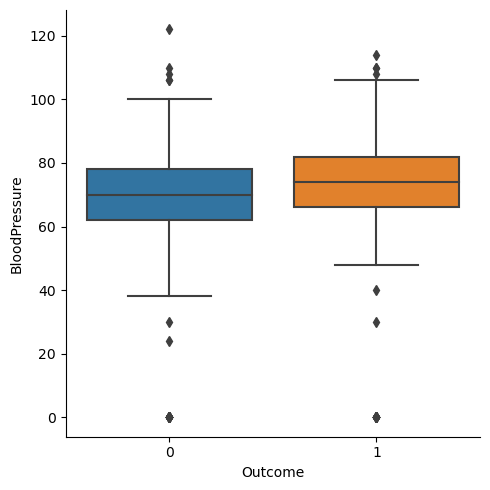

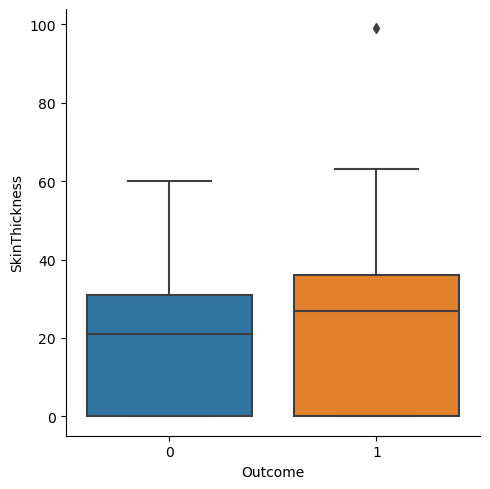

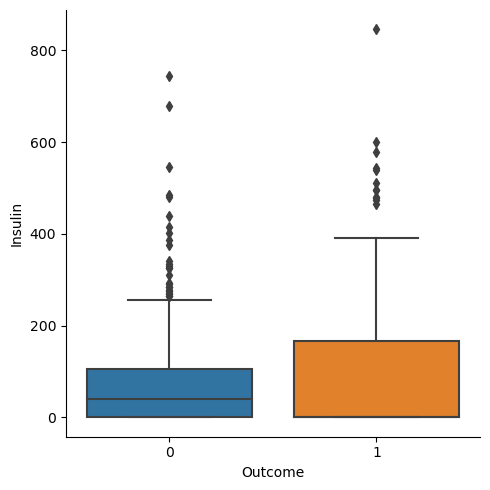

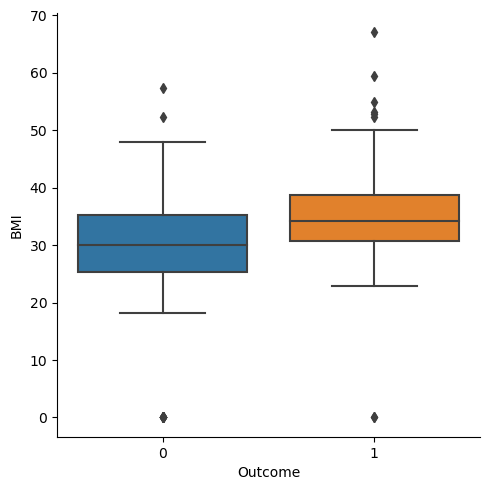

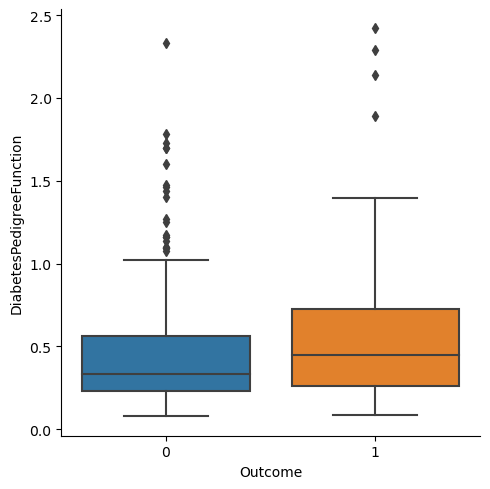

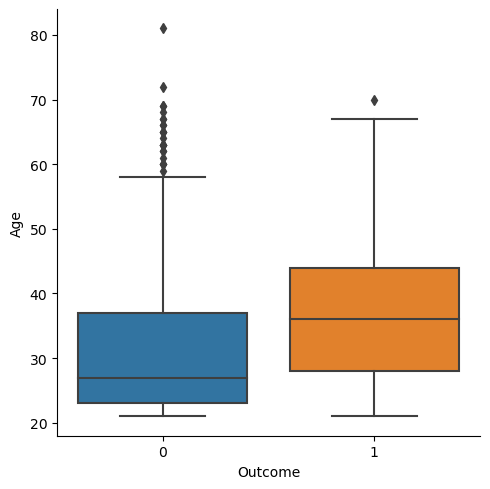

In [37]:
for key in df.columns[:-1]:
    sns.catplot(x="Outcome", y=key, kind="box", data=df)

In [38]:
df[df["Insulin"] == 0].shape[0]

374

In [39]:
df.shape

(768, 9)

To prepare our dataset for modeling, we’re taking a thoughtful approach to handle outliers and missing values, ensuring our data is both accurate and meaningful.

For the **Skin Thickness** feature, there’s just one outlier, so we’ll use *mean imputation*, giving it a realistic average value and preventing a single unusual measurement from skewing our analysis. For other missing values, we’ll apply *median imputation*, as the median is robust to outliers and helps maintain a realistic balance in the data without being influenced by extreme values.

In the **Glucose** column, we found that less than 5% of data points are missing, so we’ll simply drop those rows. With such a small proportion missing, removing these entries won’t significantly affect our dataset’s representativeness or the predictive power of our model. 

As for the **Pregnancies** feature, a value of 0 simply indicates that a particular woman hasn’t been pregnant, so we don’t need to adjust these values.

In [44]:
df["Glucose"].replace(np.nan, 0.0, inplace=True)
df = df[df["Glucose"] != 0.0]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,23,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,23,0,30.1,0.349,47,1


In [45]:
impute_cols = ["Insulin", "BloodPressure", "SkinThickness", "BMI"]
for col in impute_cols:
    med = df[col].median()
    df[col].replace(0, med, inplace=True)

In [46]:
for key in df.columns[:-1]:
    print(f"{key}: {df[df[key] == 0].shape[0]}")

Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


Text(0.5, 1.0, 'correlation between features!!')

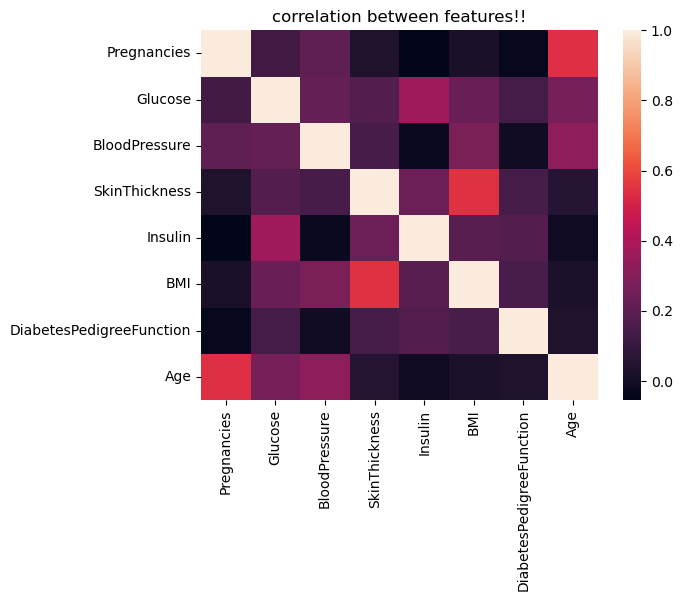

In [47]:
# sns.heatmap(df.iloc[:, -1])
sns.heatmap(df.iloc[:, :-1].corr())
plt.title("correlation between features!!")

since the correlation between every features are significantly low. besides features (age & pregnancies), (skin-thickness & BMI) which has moderate, approximately (0.6) correlation. The linear models may not be a good estimate for prediction purposes. To capture more complex relation ship we will use XGBoost and random forest as it is also not sensetive as Logistic regression to feature scaling but we will use,

Both logistic regression as well as XGBoost and random forest to see the differences..

# BUILDING MACHINE LEARNING MODELS 

In [73]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

As logistic regression is very sensetive to the scale of input features for robustness we will standardize the features but before that we will split the data into training and testing sets.

In [50]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [53]:
# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

610 153
610 153


In [58]:
# Feature scaling for Logistic regression
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_train)
x_te = scaler.transform(x_test)

#Training the Logistic regression model 
LRM = LogisticRegression()
LRM.fit(x_tr, y_train)

LogisticRegression()

In [68]:
def heatMap(matrix, xlabel, ylabel):
    sns.heatmap(matrix, annot=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("Confusion Matrix")
    plt.show()

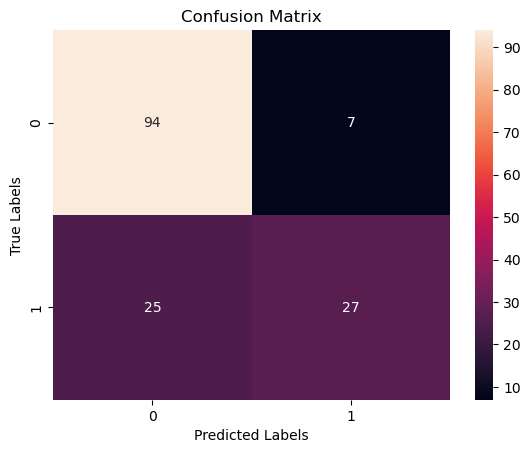

In [69]:
# predection 
LRM_predection = LRM.predict(x_te)
CM = confusion_matrix(y_test, LRM_predection)
heatMap(CM, "Predicted Labels", "True Labels")

In [65]:
print(f"The accuracy of the LRM is {round(accuracy_score(y_test, LRM_predection) * 100,2)}%")

The accuracy of the LRM is 79.08%


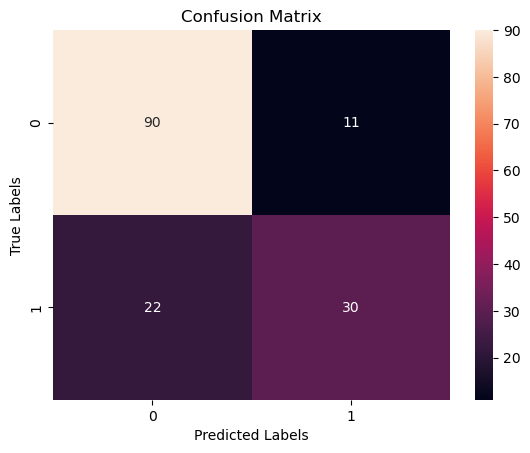

In [71]:
# Now USING XGBoost
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_predection = XGB.predict(x_test)
CM_X = confusion_matrix(y_test, XGB_predection)
heatMap(CM_X, "Predicted Labels", "True Labels")

In [72]:
print(f"The accuracy of the XGBoost is {round(accuracy_score(y_test, XGB_predection) * 100,2)}%")

The accuracy of the XGBoost is 78.43%


Confusion Matrix for Random Forest:


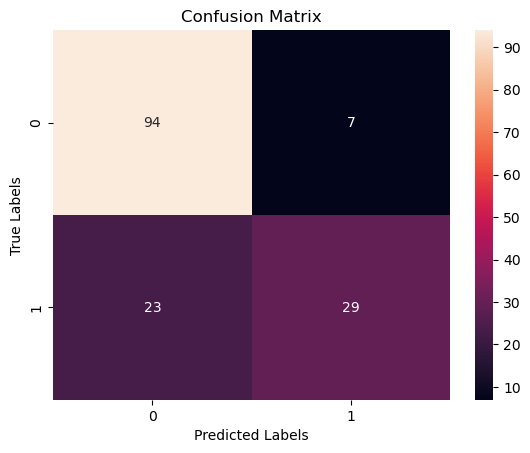

Accuracy of the Random Forest model: 80.39%


In [76]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=10) 

rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

rf_cm = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
heatMap(rf_cm, "Predicted Labels", "True Labels")

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of the Random Forest model: {round(rf_accuracy * 100, 2)}%")

In [80]:
# model selection using k-fold cross validation
est = [LRM, XGB, rf_model]
for model in est:
    if model == LRM:
        accuracies_L = cross_val_score(estimator = model, X=x_tr, y=y_train, cv=10)
        print(accuracies_L.mean())
    else:
        accuracies = cross_val_score(estimator = model, X=x_train, y=y_train, cv=10)
        print(accuracies.mean())
    

0.7639344262295081
0.7360655737704918
0.7540983606557377


### Conclusion

In this project, we aimed to predict the onset of diabetes in the Pima Indian dataset by employing three different classification models: **Logistic Regression**, **XGBoost**, and **Random Forest**. Through thorough exploratory data analysis and preprocessing, we addressed missing values, handled outliers, and standardized features to prepare the data for modeling. We then used **k-fold cross-validation** to evaluate the performance of each model, finding that all three models achieved moderate accuracy, with **Logistic Regression** achieving the highest mean accuracy among the models tested.

Despite these results, there is room for improvement in the model's predictive performance. **Future enhancements** could include:

1. **Hyperparameter Tuning**
2. **Advanced Feature Engineering**
4. **Ensemble Methods**: Combining predictions from multiple models (e.g., logistic regression, XGBoost, and Random Forest).
5. **Additional Data**

while the models achieved acceptable results, they could be significantly enhanced through these advanced methods. By implementing these improvements, we anticipate that the model can deliver more accurate and reliable predictions for diabetes onset, making it a valuable tool for early intervention and healthcare planning.


---

*The End* ✨

#### **Author**  
### Ankit Chimariya 📘

---
